In [2]:
# compare the data/mc for cluster shape/position, variables used for BDT training
# to make sure the bdt is not just learning about the difference between data/mc
# compare the affect of different cluster size used in DBSCAN
import ROOT as rt
# import root_numpy as rtnp
import csv
import re
import sys
import collections
from collections import OrderedDict
import uproot
import awkward
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, make_ratio_plot
import os
import CMS_lumi, tdrstyle
a=tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 0
import root_numpy
wH = 1
Z_MASS = 91.2

# donotdelete = []
print(sys.version)

Welcome to JupyROOT 6.22/02
3.6.8 (default, Apr  2 2020, 13:34:55) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


In [16]:
fpath =OrderedDict()
rechit_cut =OrderedDict()
path = {}
scan_nrechits = 1
rechit_size = 130
if scan_nrechits:
    rechit_cut['v18'] = 30
    rechit_cut['v15'] = 40
    rechit_cut['v14'] = 50
    rechit_cut['v16'] = 60
    rechit_cut['v17'] = 70
    rechit_cut['v24'] = 130
    rechit_cut['v28'] = 250


else:
    if rechit_size == 50:
        rechit_cut['v20'] = 0.1
        rechit_cut['v14'] = 0.2
        rechit_cut['v22'] = 0.3
        rechit_cut['v23'] = 0.4
    elif rechit_size == 130:
        rechit_cut['v25'] = 0.1
        rechit_cut['v24'] = 0.2
        rechit_cut['v26'] = 0.3
        rechit_cut['v27'] = 0.4
    else:
        print("ERROR")

for k, v in rechit_cut.items():
    path[k] = '/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/cluster_eff_year2017_norm50_V1p17'+k+'_tag_probe/'
    file_name = 'efficiency_Zmass120_800_muon50_norm50'
    fpath[str(v)] = path[k] + file_name + '.root'
if not scan_nrechits and rechit_size == 130: output_path = path['v24']
else: output_path = path['v14']

print(output_path)


suffix = "_Nrechits130"
suffix = ""



/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/cluster_eff_year2017_norm50_V1p17v14_tag_probe/


In [18]:
data_eff = {}
mc_eff = {}
sf_eff = {}
for k,v in fpath.items():
    print (k, v)
    f = rt.TFile(v)
    data_eff[k] = f.Get("data_muonEta"+suffix)
#     mc_eff[k] = f.Get("dy_120_800_muonEta"+suffix)
#     print(root_numpy.hist2array(data_eff[k]))


#     sf_eff[k] = data_eff[k].GetCopyPassedHisto()
#     sf_eff[k].Divide(data_eff[k].GetCopyTotalHisto())
    
    data_eff_temp = f.Get("data_muonEta"+suffix)
    mc_eff_temp = f.Get("dy_120_800_muonEta"+suffix)
    data_eff[k] = data_eff_temp.GetCopyPassedHisto()
    mc_eff[k] = mc_eff_temp.GetCopyPassedHisto()
    for i in range(data_eff[k].GetXaxis().GetNbins()+1):
        data_eff[k].SetBinContent(i+1,data_eff_temp.GetEfficiency(i+1))
        mc_eff[k].SetBinContent(i+1,mc_eff_temp.GetEfficiency(i+1))
        data_eff[k].SetBinError(i+1,max(data_eff_temp.GetEfficiencyErrorLow(i+1), data_eff_temp.GetEfficiencyErrorUp(i+1)))
        mc_eff[k].SetBinError(i+1,max(mc_eff_temp.GetEfficiencyErrorLow(i+1), mc_eff_temp.GetEfficiencyErrorUp(i+1)))
#     print(data_eff[k].GetBinContent(1), data_eff[k].GetBinError(1))
#     print(mc_eff[k].GetBinContent(1), mc_eff[k].GetBinError(1))
    sf_eff[k] = data_eff[k]
    sf_eff[k].Divide(mc_eff[k])
    sf_eff[k].GetYaxis().SetTitle("Scale Factor")
#     print(sf_eff[k].GetBinContent(1), sf_eff[k].GetBinError(1))
    



#     for i in range(data_eff[k].GetXaxis().GetNbins()+1):
# #         if data_eff[k].GetBinContent(i+1) == 0:  sf_eff[k].SetBinError(i+1, data_eff[k].GetBinError(i+1)/mc_eff[k].GetBinContent(i+1))
# #         print(sf_eff[k].GetBinError(i+1), sf_eff[k].GetBinContent(i+1), data_eff[k].GetBinError(i+1), mc_eff[k].GetBinContent(i+1))
# #     denom = mc_eff[k].GetCopyPassedHisto()
# #     denom.Divide(mc_eff[k].GetCopyTotalHisto())
# #     sf_eff[k].Divide(denom)
# #     sf_eff[k].GetYaxis().SetTitle("Scale Factor")
# #     for i in range(sf_eff[k].GetNbinsX()):
# #         if denom.GetBinContent(i+1) == 0:sf_eff[k].SetBinError(i+1, 0.0)
# #         else:sf_eff[k].SetBinError(i+1, denom.GetBinError(i+1)/denom.GetBinContent(i+1)*sf_eff[k].GetBinContent(i+1))
# #     print(root_numpy.hist2array(sf_eff[k]))


30 /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/cluster_eff_year2017_norm50_V1p17v18_tag_probe/efficiency_Zmass120_800_muon50_norm50.root
40 /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/cluster_eff_year2017_norm50_V1p17v15_tag_probe/efficiency_Zmass120_800_muon50_norm50.root
50 /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/cluster_eff_year2017_norm50_V1p17v14_tag_probe/efficiency_Zmass120_800_muon50_norm50.root
60 /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/cluster_eff_year2017_norm50_V1p17v16_tag_probe/efficiency_Zmass120_800_muon50_norm50.root
70 /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/cluster_eff_year2017_norm50_V1p17v17_tag_probe/efficiency_Zmass120_800_muon50_norm50.root
130 /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/cluster_e

Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only s

/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/cluster_eff_year2017_norm50_V1p17v14_tag_probe/efficiency_clusterSizeCompare_sf_eff_efficiency_Zmass120_800_muon50_norm50.png


Info in <TCanvas::Print>: png file /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/cluster_eff_year2017_norm50_V1p17v14_tag_probe/efficiency_clusterSizeCompare_sf_eff_efficiency_Zmass120_800_muon50_norm50_scanNrechits.png has been created
Info in <TCanvas::SaveSource>: C++ Macro file: /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/cluster_eff_year2017_norm50_V1p17v14_tag_probe/efficiency_clusterSizeCompare_sf_eff_efficiency_Zmass120_800_muon50_norm50_scanNrechits.C has been generated


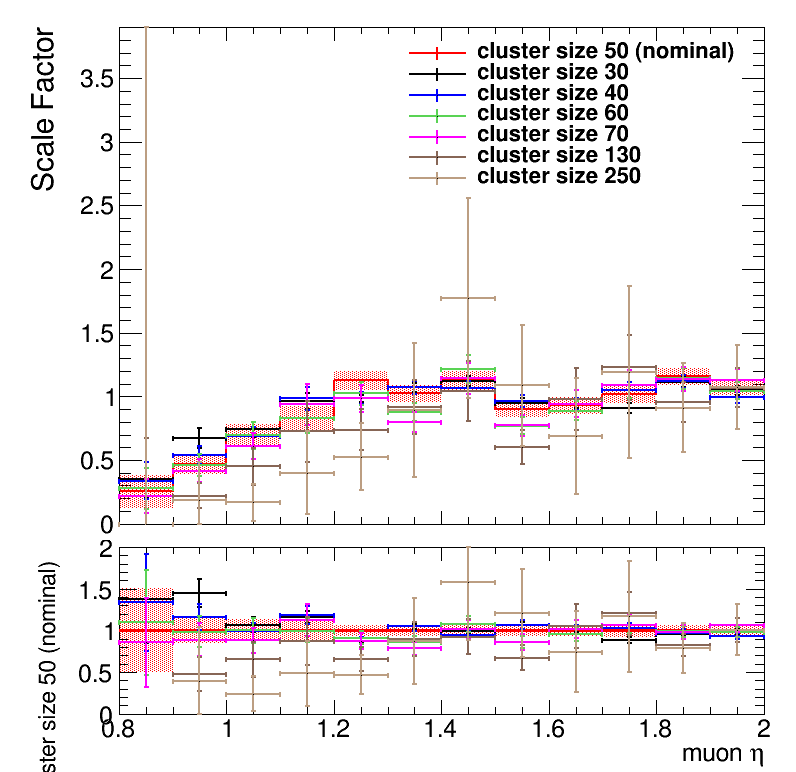

In [20]:
# plots
import root_numpy
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot, make_ratio_pEff

c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.2,0.80,0.4,0.90)
leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)

var = [mc_eff, data_eff, sf_eff]
names = ['mc_eff', 'data_eff', 'sf_eff']


for j in range(len(var)):
    if not j == 2:continue
    for i, k in enumerate(var[j].keys()):
        var[j][k].SetLineWidth(2)
        var[j][k].SetLineColor(std_color_list[i])
#         print(k, var[j][k].GetEfficiency(1))
    if scan_nrechits:
        var[j]['30'].SetLineColor(std_color_list[0])
        var[j]['40'].SetLineColor(std_color_list[2])
        var[j]['50'].SetLineColor(std_color_list[1])
        var[j]['60'].SetLineColor(std_color_list[3])
        var[j]['70'].SetLineColor(std_color_list[4])
#         c = make_ratio_plot([var[j]['50'], var[j]['30'], var[j]['40'],  var[j]['60'], var[j]['70'], var[j]['130']], fit = False, logy=False, \
#         in_tags = ["cluster size 50 (nominal)", "cluster size 30", "cluster size 40", "cluster size 60", "cluster size 70", "cluster size 130"], ratio_bounds = [0.5,2.0], draw_opt = ['E2','E1','E1','E1','E1', 'E1']) 
        c = make_ratio_plot([var[j]['50'], var[j]['30'], var[j]['40'],  var[j]['60'], var[j]['70'], var[j]['130'], var[j]['250']], fit = False, logy=False, \
        in_tags = ["cluster size 50 (nominal)", "cluster size 30", "cluster size 40", "cluster size 60", "cluster size 70",  "cluster size 130", "cluster size 250"], ratio_bounds = [0.0,2.0], draw_opt = ['E2', 'E1','E1','E1','E1','E1', 'E1']) 
    else:
        c = make_ratio_plot([var[j]['0.2'], var[j]['0.1'], var[j]['0.3'],  var[j]['0.4']], fit = False, logy=False, \
        in_tags = ["#Delta R = 0.2 (nominal)", "#Delta R = 0.1" , "#Delta R = 0.3", "#Delta R = 0.4"], ratio_bounds = [0.5,2.0], draw_opt = ['E2','E1','E1','E1']) 
       
    c.Draw()
    print(output_path+"efficiency_clusterSizeCompare_"+names[j] + '_' + file_name + suffix+'.png')
    if scan_nrechits:
        c.SaveAs(output_path+"efficiency_clusterSizeCompare_"+names[j] + '_' + file_name + suffix+'_scanNrechits.png')
        c.SaveAs(output_path+"efficiency_clusterSizeCompare_"+names[j] + '_' + file_name + suffix+'_scanNrechits.C')
    else:
        c.SaveAs(output_path+"efficiency_clusterSizeCompare_"+names[j] + '_' + file_name + suffix+'_scanDeltaR.png')
        c.SaveAs(output_path+"efficiency_clusterSizeCompare_"+names[j] + '_' + file_name + suffix+'_scanDeltaR.C')
